<a href="https://colab.research.google.com/github/Abuton/Abuton/blob/main/Celebrity_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 11.2MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 194kB 24.7MB/s 
     |████████████████████████████████| 1.2MB 37.3MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
from fastai.vision import *

In [4]:
root_dir = "/content/drive/MyDrive/data/"
base_dir = root_dir + "images"
path = Path(root_dir)

In [5]:
print(path)

/content/drive/MyDrive/data


(116, 162)


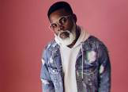

In [13]:
path.ls
from PIL import Image
img = Image.open('/content/gdrive/MyDrive/data/images/falzs/falz7.jpg')
print(img.shape)
img.to_thumb(128,128)

In [14]:
fields = DataBlock(blocks = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y = parent_label,
                   splitter = RandomSplitter(valid_pct=0.2, seed=42),
                   item_tfms = RandomResizedCrop(120, min_scale = 0.5),
                   batch_tfms = aug_transforms())

In [27]:
path = Path("/content/gdrive/MyDrive/data/images")

In [28]:
tfms = aug_transforms(do_flip = True, flip_vert = False, mult=2.0)

data= ImageDataLoaders.from_folder(path,train = "train", valid_pct=0.2, item_tfms=Resize(128),
                                   batch_tfms=tfms, bs = 30, num_workers = 4)

In [33]:
Data = DataBlock( blocks=(ImageBlock, CategoryBlock), get_items=get_image_files, 
splitter=RandomSplitter(valid_pct=0.2, seed=42), get_y=parent_label, item_tfms=Resize(128))
dls = Data.dataloaders(path)

In [34]:
dls.vocab

['2faces', 'cats', 'falzs', 'olamides']

In [40]:
dls.train.show_batch(8)

TypeError: ignored

In [35]:
learn = cnn_learner(data, resnet34, metrics=error_rate)

learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.743683,2.056975,0.812500,00:17


epoch,train_loss,valid_loss,error_rate,time
0,1.770582,1.203014,0.500000,00:00
1,1.819850,0.971263,0.437500,00:00
2,1.600122,0.972392,0.500000,00:00
3,1.398159,1.070646,0.375000,00:00
4,1.225557,1.092716,0.437500,00:00


In [44]:
learn.unfreeze()
learn.fit_one_cycle(8, lr_max=slice(1e-5, 5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.731338,123.106163,0.750000,00:00
1,1.838266,55.810375,0.750000,00:00
2,1.915170,23.761049,0.750000,00:00
3,1.841020,10.622207,0.437500,00:00
4,1.809670,7.452514,0.500000,00:00
5,1.777877,5.048348,0.437500,00:00
6,1.752900,3.785240,0.500000,00:00
7,1.779761,3.708488,0.437500,00:00


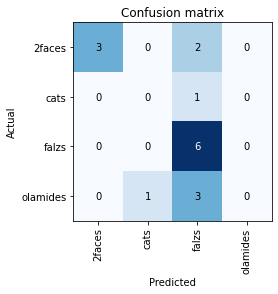

In [46]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

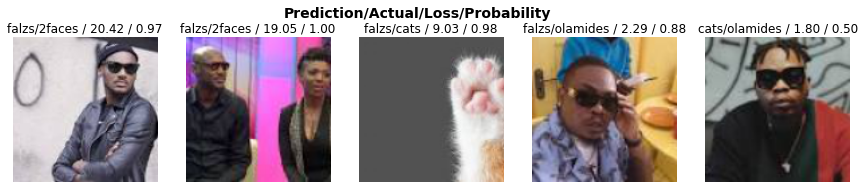

In [47]:
interp.plot_top_losses(5, nrows=1)

In [48]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [49]:
learn.export()

In [51]:
learn_inf = load_learner(path/'export.pkl')
learn_inf.predict(path/'falzs/falz1.jpg')

('cats', tensor(1), tensor([0.0759, 0.4941, 0.3169, 0.1131]))

In [52]:
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [ ]:
!pip install voila
!jupyter serverextension enable voila --sys-prefix